In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ConfusionMatrix

In [6]:
df=pd.read_csv(r"C:\Users\Ayodhya SP\Downloads\letter rec\letter-recognition.csv",sep=",")

In [7]:
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [8]:
x=df.iloc[:,1:17]
y=df.select_dtypes(include=[object])

In [9]:
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x,y,test_size=0.02,random_state=20)

In [10]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [11]:
x_train=scaler.transform(x_train)
x_validation=scaler.transform(x_validation)

In [12]:
mlp=MLPClassifier(hidden_layer_sizes=(250,300),max_iter=1000000,activation='logistic')

In [13]:
cm=ConfusionMatrix(mlp,classes="a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z".split(','))

ConfusionMatrix(ax=<AxesSubplot:>,
                classes=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
                         'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
                         'w', 'x', 'y', 'z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x00000219DC120D00>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

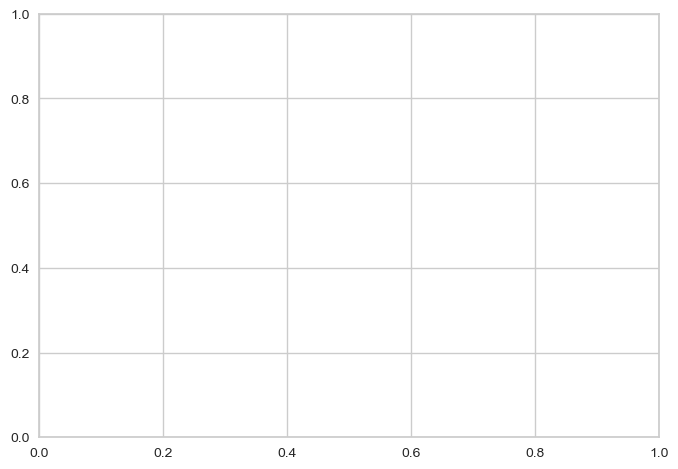

In [14]:
cm.fit(x_train,y_train.values.ravel())

In [15]:
cm.score(x_validation,y_validation)

C:\Users\Ayodhya SP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9725

In [16]:
predictions=cm.predict(x_validation)

In [17]:
print(accuracy_score(y_validation,predictions))

0.9725


In [18]:
print(confusion_matrix(y_validation,predictions))

[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 15  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  0  0  0  0  0 21  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

In [19]:
print(classification_report(y_validation,predictions,digits=5))

              precision    recall  f1-score   support

           A    1.00000   1.00000   1.00000        16
           B    0.95238   0.95238   0.95238        21
           C    1.00000   0.94444   0.97143        18
           D    0.87500   1.00000   0.93333        14
           E    1.00000   0.93750   0.96774        16
           F    1.00000   0.92308   0.96000        13
           G    0.92857   0.92857   0.92857        14
           H    1.00000   1.00000   1.00000         9
           I    1.00000   1.00000   1.00000         6
           J    1.00000   1.00000   1.00000        21
           K    0.95455   0.91304   0.93333        23
           L    1.00000   1.00000   1.00000        12
           M    1.00000   1.00000   1.00000         9
           N    0.95000   1.00000   0.97436        19
           O    1.00000   1.00000   1.00000        16
           P    0.88889   1.00000   0.94118        16
           Q    1.00000   1.00000   1.00000        13
           R    0.87500   0

In [26]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>